<a href="https://colab.research.google.com/github/alexbonella/Tensorflow2/blob/master/Flower_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install tensorflow==2.0.0-beta1

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import io
import cv2
import os
from tqdm import tqdm



print(tf.__version__)

2.1.0


# Cargamos archivos desde local

In [0]:

# Cargamos archivos a Colab 

#from google.colab import files
#uploaded = files.upload()

In [0]:
!ls

flowers-recognition		 matriz_confusion.py  sample_data
flowers-recognition-dataset.zip  __pycache__


In [0]:
! pwd

/content


# Descompresion de nuestro dataset 

In [0]:
#data = zipfile.ZipFile('flowers-recognition-dataset.zip',mode='r')
#data.extractall()

In [0]:
!ls  # Verificamos el proceso

flowers-recognition		 matriz_confusion.py  sample_data
flowers-recognition-dataset.zip  __pycache__


In [0]:
os.listdir('flowers-recognition/flowers_train')

['rose', 'daisy', 'dandelion', 'tulip', 'sunflower']

# Lectura de imagenes

In [0]:
especie=['daisy','dandelion','rose','sunflower','tulip']

# Imagenes para entrenamiento

Para este dataset de entranamiento tenemos imagenes de 5 especies de flores daisy,dandelion,rose,sunflower y tulip  distribuidos de la siguiente manera :

1. **Daisy :** 719 imagenes
2. **Dandelion :** 1000 imagenes
3. **Rose :** 724 imagenes
4. **Sunflower :** 689 imagenes
5. **Tulip :** 923 imagenes


In [0]:
Largo=200
Altura=200

In [0]:
train_img=[]
train_tag=[]


for flower in tqdm(range(len(especie))):

  for i in os.listdir('flowers-recognition/flowers_train/'+especie[flower]):

    try : 
      img=cv2.imread('flowers-recognition/flowers_train/'+especie[flower]+'/'+i)
      train_img.append(cv2.resize(img,(Largo,Altura)))
  
   
      if (especie[flower]=='daisy'):
        train_tag.append(0)
      elif (especie[flower]=='dandelion'):
        train_tag.append(1)
      elif (especie[flower]=='rose'):
        train_tag.append(2)
      elif (especie[flower]=='sunflower'):
        train_tag.append(3)  
      else:
        train_tag.append(4)
    except:
      pass
 

100%|██████████| 5/5 [00:08<00:00,  1.75s/it]


In [0]:
len(train_img)

4052

In [0]:
len(train_tag)

4052

# Imagenes para validacion

Para este dataset de validación tenemos imagenes de 5 especies de flores daisy,dandelion,rose,sunflower y tulip  distribuidos de la siguiente manera :

1. **Daisy :** 50 imagenes
2. **Dandelion :** 55 imagenes
3. **Rose :** 60 imagenes
4. **Sunflower :** 45 imagenes
5. **Tulip :** 61 imagenes

In [0]:
test_img=[]
test_tag=[]

for flower in tqdm(range(len(especie))):

  for i in os.listdir('flowers-recognition/flowers_test/'+especie[flower]):

    try : 
      img=cv2.imread('flowers-recognition/flowers_test/'+especie[flower]+'/'+i)
      test_img.append(cv2.resize(img,(Largo,Altura)))
  
   
      if (especie[flower]=='daisy'):
        test_tag.append(0)
      elif (especie[flower]=='dandelion'):
        test_tag.append(1)
      elif (especie[flower]=='rose'):
        test_tag.append(2)
      elif (especie[flower]=='sunflower'):
        test_tag.append(3)  
      else:
        test_tag.append(4)
    except:
      pass
 

100%|██████████| 5/5 [00:00<00:00,  6.73it/s]


In [0]:
len(test_img)

271

In [0]:
len(test_tag)

271

In [0]:
test_img[200].shape

(200, 200, 3)

In [0]:
len(train_img)  # Imagenes para entrenamiento

4052

In [0]:
len(test_img)  # Imagenes para validación

271

# Visualización de imagenes

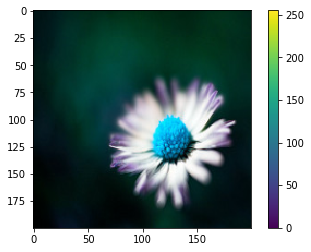

In [0]:
plt.figure()
plt.imshow(train_img[500])
plt.colorbar()
plt.grid(False)
plt.show()

# Verificamos el etiquetado

Imprimimos 24 imagenes de prueba para verificar si el etiquetado es correcto.

In [0]:
class_names = ['daisy','dandelion','rose','sunflower','tulip']

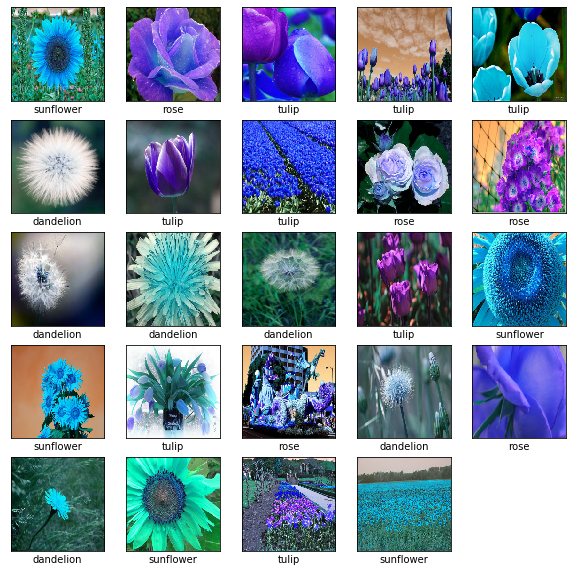

In [0]:
plt.figure(figsize=(10,10))
for i in range(24):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    random_number=np.random.randint(800,4000)
    plt.imshow(train_img[random_number+i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_tag[random_number+i]])
plt.show()

In [0]:
type(train_img)  # Imagenes cargadas como lista

list

# Convertimos a array nuestras imagenes

In [0]:
train_images=np.asarray(train_img)
test_images=np.asarray(test_img)

In [0]:
print(train_images.shape)
print('\n')
print(test_images.shape)

(4052, 200, 200, 3)


(271, 200, 200, 3)


# Normalizamos imagenes

Normalización de nuestro dataset
A continuación dividimos nuestras imagenes por 255 para obtener valores entre 0 y 1


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
train_tag = np.array(train_tag)
test_tag = np.array(test_tag)

# Creación de nuestro modelo

In [0]:
# Modelo -- 1

#model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(Largo,Altura,3)),
#    keras.layers.Dense(128, activation='relu'),
    
#    keras.layers.Dense(5, activation='softmax'),
    
#])

In [0]:
# Modelo -- 2

model = keras.Sequential([
    
    # CONV1 Y MAX-POOLING1
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(Largo,Altura,3), padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    # CONV2 Y MAX-POOLING2
    
    keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    # Aplanar, FC1, FC2 y salida
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(84, activation='relu'),
   #keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='softmax')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               40960256  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

# Compilamos el modelo

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos nuestro modelo

In [0]:
model.fit(train_images, train_tag, epochs=100,batch_size=32,verbose=1)

Train on 4052 samples
Epoch 1/100
4052/4052 [==============================] - 9s 2ms/sample - loss: 1.4950 - accuracy: 0.3243
Epoch 2/100
4052/4052 [==============================] - 6s 1ms/sample - loss: 1.2917 - accuracy: 0.4423
Epoch 3/100
4052/4052 [==============================] - 6s 1ms/sample - loss: 1.1743 - accuracy: 0.5165
Epoch 4/100
4052/4052 [==============================] - 6s 1ms/sample - loss: 1.1223 - accuracy: 0.5454
Epoch 5/100
4052/4052 [==============================] - 6s 1ms/sample - loss: 1.0645 - accuracy: 0.5785
Epoch 6/100
4052/4052 [==============================] - 6s 1ms/sample - loss: 1.0135 - accuracy: 0.5948
Epoch 7/100
4052/4052 [==============================] - 6s 1ms/sample - loss: 0.9849 - accuracy: 0.6133
Epoch 8/100
4052/4052 [==============================] - 6s 1ms/sample - loss: 0.9437 - accuracy: 0.6362
Epoch 9/100
4052/4052 [==============================] - 6s 1ms/sample - loss: 0.9078 - accuracy: 0.6476
Epoch 10/100
4052/4052 [=========

# Desempeño del modelo

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_tag, verbose=1)

print('\nTest accuracy:', test_acc)

271/271 [==============================] - 0s 1ms/sample - loss: 1.6178 - accuracy: 0.7048

Test accuracy: 0.704797


**NOTA :** Como podemos observar nuestro modelo logra clasificar nuestras imagenes con un  **70.48 %** de exactitud  , entonces el siguiente paso es evaluar las metricas e identificar que clase logra una mejor predicción

# Predicciones del modelo

In [0]:
predictions = model.predict(test_images)

In [0]:
np.argmax(predictions[100]) # Predicción del modelo

1

In [0]:
test_tag[100] # Etiqueta real 

1

# Visualización de nuestras predicciones

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Visualizamos una imagen en particular

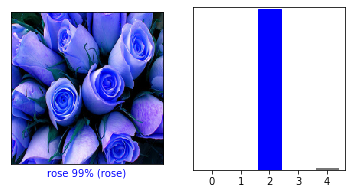

In [0]:
i = 140
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_tag, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_tag)
plt.show()

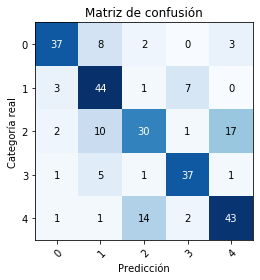

In [0]:
from matriz_confusion import graficar_matriz_de_confusion

y_pred = np.argmax(predictions,axis=1)
etiquetas = ['0','1','2','3','4']
graficar_matriz_de_confusion(test_tag, y_pred, etiquetas)






<table>
  <tr>
    <th>Label</th>
    <th>Flower Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Daisy</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Dandelion</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Rose</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Sunflower</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Tulip</td>
  </tr>
   
</table>


# Observaciones 

Como podemos observar la clases en la que mas acerto nuestro modelo fueron  ***Sunflower*** seguidamente la categoria ***Dandelion y Daisy*** por otro lado la clase que presento mas desaciertos fue ***Rose*** , como recomendación queda probar con otras arquitecturas ya entrenadas y jugar con los parametros de epocas y tamaño de lote . 

# Guardamos nuestro modelo ya entrenado

In [0]:
target_dir = './Flow_recog_-model/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('./Flow_recog_-model/modelo_FR.h5')
model.save_weights('./Flow_recog_-model/pesos_FR.h5')

# Descarga de nuestro modelo entrenado

In [0]:
os.listdir('Flow_recog_-model')

['modelo_FR.h5', 'pesos_FR.h5']

# FIN ....